In [33]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.python.keras.layers import Dense
from numpy.random import default_rng
from sklearn.model_selection import train_test_split

In [103]:
# data = pd.read_csv('data/walk_data_14_Fernando.txt', sep=",", header=None, names=["e_t_x","e_t_y","e_t_z","e_r_x","e_r_y","e_r_z","e_r_w","d_t_x","d_t_y","d_t_z","d_r_x","d_r_y","d_r_z","d_r_w", "c_t_x","c_t_y","c_t_z","c_r_x","c_r_y","c_r_z", "c_r_w"])
# data_fernando = pd.read_csv('data/walk_data_1_Fernando.txt', sep=",", header=None, names=["e_t_x","e_t_y","e_t_z","e_r_x","e_r_y","e_r_z","d_t_x","d_t_y","d_t_z","d_r_x","d_r_y","d_r_z","c_t_x","c_t_y","c_t_z","c_r_x","c_r_y","c_r_z"])
data = pd.read_csv('data/full_data_5.csv', sep=",", header=None, names=["e_t_x","e_t_y","e_t_z","e_r_x","e_r_y","e_r_z","e_r_w","d_t_x","d_t_y","d_t_z","d_r_x","d_r_y","d_r_z","d_r_w", "c_t_x","c_t_y","c_t_z","c_r_x","c_r_y","c_r_z", "c_r_w", "speed"])

In [104]:
data

,e_t_x,e_t_y,e_t_z,e_r_x,e_r_y,e_r_z,e_r_w,d_t_x,d_t_y,d_t_z,...,d_r_z,d_r_w,c_t_x,c_t_y,c_t_z,c_r_x,c_r_y,c_r_z,c_r_w,speed
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,stopped
1,0.000,0.000,0.000,0.000,-0.001,0.000,0.000,0.000,0.000,0.0,...,-0.001,0.000,0.000,0.0,0.000,0.001,0.000,0.001,0.0,stopped
2,-0.001,0.000,0.000,0.000,0.001,0.000,0.000,-0.001,0.000,0.0,...,0.000,0.000,0.000,0.0,0.000,0.001,0.000,0.000,0.0,stopped
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,stopped
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,stopped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83988,-0.001,-0.001,-0.007,-0.022,0.021,-0.027,-0.006,0.000,0.000,0.0,...,0.001,-0.005,-0.002,0.0,0.001,0.000,0.000,0.001,0.0,fast
83989,0.003,-0.001,-0.008,-0.010,-0.010,0.010,-0.004,-0.001,-0.001,0.0,...,0.000,-0.003,-0.003,0.0,0.001,0.001,0.000,0.001,0.0,fast
83990,0.002,-0.003,-0.009,-0.004,-0.004,0.005,0.008,0.000,0.000,0.0,...,0.001,0.000,-0.004,0.0,0.000,0.001,-0.001,0.002,0.0,fast
83991,0.002,-0.002,-0.012,0.002,0.003,-0.002,0.006,0.000,0.000,0.0,...,0.001,-0.001,-0.003,0.0,0.001,0.000,-0.002,0.002,0.0,fast


In [105]:
result_stop = data[data.speed=="stopped"][1:]

result_stop.to_csv('data/vel_parada.txt', index=False)

In [106]:

result_slow = data[data.speed=="slow"][1:]
result_slow.to_csv('data/vel_media.txt', index=False)

In [107]:
result_fast = data[data.speed=="fast"][1:]
result_fast.to_csv('data/vel_rapida.txt', index=False)
result_fast

,e_t_x,e_t_y,e_t_z,e_r_x,e_r_y,e_r_z,e_r_w,d_t_x,d_t_y,d_t_z,...,d_r_z,d_r_w,c_t_x,c_t_y,c_t_z,c_r_x,c_r_y,c_r_z,c_r_w,speed
12000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
12001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
12002,0.000,0.000,0.000,0.000,-0.001,0.001,0.000,-0.006,-0.001,-0.016,...,-0.002,-0.002,0.004,-0.001,-0.001,0.003,0.002,-0.006,-0.001,fast
12003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
12004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83988,-0.001,-0.001,-0.007,-0.022,0.021,-0.027,-0.006,0.000,0.000,0.000,...,0.001,-0.005,-0.002,0.000,0.001,0.000,0.000,0.001,0.000,fast
83989,0.003,-0.001,-0.008,-0.010,-0.010,0.010,-0.004,-0.001,-0.001,0.000,...,0.000,-0.003,-0.003,0.000,0.001,0.001,0.000,0.001,0.000,fast
83990,0.002,-0.003,-0.009,-0.004,-0.004,0.005,0.008,0.000,0.000,0.000,...,0.001,0.000,-0.004,0.000,0.000,0.001,-0.001,0.002,0.000,fast
83991,0.002,-0.002,-0.012,0.002,0.003,-0.002,0.006,0.000,0.000,0.000,...,0.001,-0.001,-0.003,0.000,0.001,0.000,-0.002,0.002,0.000,fast


In [132]:
# Loading pipeline params.
DATA_PATH = Path('data')
FILENAME_FAST = 'vel_rapida.txt'
FILENAME_SLOW = 'vel_media.txt'
FILENAME_STOP = 'vel_parada.txt'
NUM_TIMESTEPS = 8
IGNORE_FRACTION = 0.1
TEST_FRACTION = 0.25

# Training params.
LEARNING_RATE = 1e-4
EPOCHS = 100
BATCH_SIZE = 1024

In [133]:
def load_data(
    path_stop,
    path_fast,
    path_slow,
    num_timesteps,
    ignore_fraction,
    test_fraction,
):

    def read_and_prepare_data(
        path,
        class_,
        num_timesteps,
        ignore_fraction,
        test_fraction,
    ):

        def split_temporally(X, test_fraction):
            num_samples = X.shape[0]
            num_train = int(num_samples * (1.0 - test_fraction))
            X_train, X_test = X[:num_train], X[num_train:]
            return X_train, X_test

        def transform_into_sequences(X, num_timesteps):
            num_samples = X.shape[0]
            X_seq = []
            for k in range(num_samples - num_timesteps + 1):
                X_seq.append(X[k:(k + num_timesteps)])
            X_seq = np.array(X_seq)
            y_seq = class_ * np.ones((X_seq.shape[0], 1))
            return X_seq, y_seq

        X = pd.read_csv(path).values
        X = X[:, [0,1,2,7,8,9]]  # Use only feet translations.

        # Ignore beginning and end.
        num_samples = X.shape[0]
        num_ignore = int(ignore_fraction * num_samples)
        X = X[num_ignore:-num_ignore]

        # Split X temporally.
        X_train, X_test = split_temporally(X, test_fraction)

        # Transform X into short sequences.
        X_train, y_train = transform_into_sequences(X_train, num_timesteps)
        X_test, y_test = transform_into_sequences(X_test, num_timesteps)

        return X_train, y_train, X_test, y_test

    def shuffle_data(X, y):
        idx = np.arange(len(X))
        default_rng().shuffle(idx)
        X_shuffled = X[idx, :]
        y_shuffled = y[idx]
        return X_shuffled, y_shuffled

    X_train_fast, y_train_fast, X_test_fast, y_test_fast = \
        read_and_prepare_data(
            path_fast,
            2.0,
            num_timesteps,
            ignore_fraction,
            test_fraction,
        )

    X_train_stop, y_train_stop, X_test_stop, y_test_stop = \
        read_and_prepare_data(
            path_stop,
            0.0,
            num_timesteps,
            ignore_fraction,
            test_fraction,
        )
    X_train_slow, y_train_slow, X_test_slow, y_test_slow = \
        read_and_prepare_data(
            path_slow,
            1.0,
            num_timesteps,
            ignore_fraction,
            test_fraction,
        )

    X_train = np.concatenate((X_train_fast, X_train_slow, X_train_stop), axis=0)
    y_train = np.concatenate((y_train_fast, y_train_slow, y_train_stop), axis=0)
    X_test = np.concatenate((X_test_fast, X_test_slow, X_test_stop), axis=0)
    y_test = np.concatenate((y_test_fast, y_test_slow, y_test_stop), axis=0)

    X_train, y_train = shuffle_data(X_train, y_train)
    X_test, y_test = shuffle_data(X_test, y_test)

    return X_train, X_test, y_train, y_test


path_fast = Path(DATA_PATH, FILENAME_FAST)
path_slow = Path(DATA_PATH, FILENAME_SLOW)
path_stop = Path(DATA_PATH, FILENAME_STOP)
X_train, X_test, y_train, y_test = load_data(
    path_stop,
    path_fast,
    path_slow,
    NUM_TIMESTEPS,
    IGNORE_FRACTION,
    TEST_FRACTION,
)

In [134]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50375, 8, 6), (50375, 1), (16779, 8, 6), (16779, 1))

In [135]:
X_train[0]

array([[0.001, 0.0, -0.001, -0.001, 0.0, 0.001],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, -0.001, 0.005, 0.003, 0.022],
       [-0.002, 0.0, 0.0, -0.001, -0.019, 0.003],
       [0.0, 0.0, 0.001, -0.002, -0.009, -0.008]], dtype=object)

In [136]:
from functools import partial

_, num_time, num_feat = X_train.shape

activation = 'selu'

DefaultConv1D = partial(
    keras.layers.Conv1D,
    kernel_size=1,
    activation=activation,
    padding="valid",
)

model = keras.models.Sequential([
    DefaultConv1D(4 * num_feat, kernel_size=4, input_shape=[num_time, num_feat]),
    keras.layers.BatchNormalization(),
    DefaultConv1D(num_feat, kernel_size=2),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(num_time * num_feat, activation=activation),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(num_feat, activation=activation),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(3, activation='softmax'),
])

In [137]:
X_train=np.array(X_train, dtype=np.float)
y_train=np.array(y_train, dtype=np.float)
X_test=np.array(X_test, dtype=np.float)
y_test=np.array(y_test, dtype=np.float)

/var/folders/0t/r6pd3gzs67n8rkyyt6l75dy80000gn/T/ipykernel_757/1231226972.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=np.array(X_train, dtype=np.float)
/var/folders/0t/r6pd3gzs67n8rkyyt6l75dy80000gn/T/ipykernel_757/1231226972.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train=np.array(y_train, dtype=np.float)
/var

In [138]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 5, 24)             600       
                                                                 
 batch_normalization_52 (Bat  (None, 5, 24)            96        
 chNormalization)                                                
                                                                 
 conv1d_27 (Conv1D)          (None, 4, 6)              294       
                                                                 
 flatten_13 (Flatten)        (None, 24)                0         
                                                                 
 batch_normalization_53 (Bat  (None, 24)               96        
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 48)              

In [142]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/100
50/50 [==============================] - 5s 31ms/step - loss: 0.3712 - accuracy: 0.8459 - val_loss: 0.7713 - val_accuracy: 0.6421
Epoch 2/100
50/50 [==============================] - 1s 20ms/step - loss: 0.3699 - accuracy: 0.8460 - val_loss: 0.6001 - val_accuracy: 0.7142
Epoch 3/100
50/50 [==============================] - 1s 19ms/step - loss: 0.3700 - accuracy: 0.8454 - val_loss: 0.5802 - val_accuracy: 0.7260
Epoch 4/100
50/50 [==============================] - 1s 19ms/step - loss: 0.3691 - accuracy: 0.8460 - val_loss: 0.6570 - val_accuracy: 0.6921
Epoch 5/100
50/50 [==============================] - 1s 20ms/step - loss: 0.3707 - accuracy: 0.8449 - val_loss: 0.6084 - val_accuracy: 0.7245
Epoch 6/100
50/50 [==============================] - 1s 20ms/step - loss: 0.3697 - accuracy: 0.8452 - val_loss: 0.6005 - val_accuracy: 0.7307
Epoch 7/100
50/50 [==============================] - 1s 20ms/step - loss: 0.3702 - accuracy: 0.8456 - val_loss: 0.6564 - val_accuracy: 0.6884
Epoch 

50/50 [==============================] - 1s 19ms/step - loss: 0.3643 - accuracy: 0.8485 - val_loss: 0.6173 - val_accuracy: 0.7018
Epoch 59/100
50/50 [==============================] - 1s 18ms/step - loss: 0.3641 - accuracy: 0.8490 - val_loss: 0.7270 - val_accuracy: 0.6698
Epoch 60/100
50/50 [==============================] - 1s 21ms/step - loss: 0.3628 - accuracy: 0.8489 - val_loss: 0.6403 - val_accuracy: 0.6915
Epoch 61/100
50/50 [==============================] - 1s 18ms/step - loss: 0.3635 - accuracy: 0.8483 - val_loss: 0.8318 - val_accuracy: 0.6386
Epoch 62/100
50/50 [==============================] - 1s 19ms/step - loss: 0.3647 - accuracy: 0.8492 - val_loss: 1.4053 - val_accuracy: 0.3628
Epoch 63/100
50/50 [==============================] - 1s 20ms/step - loss: 0.3638 - accuracy: 0.8488 - val_loss: 0.8766 - val_accuracy: 0.5172
Epoch 64/100
50/50 [==============================] - 1s 19ms/step - loss: 0.3638 - accuracy: 0.8488 - val_loss: 1.0043 - val_accuracy: 0.3780
Epoch 65/100

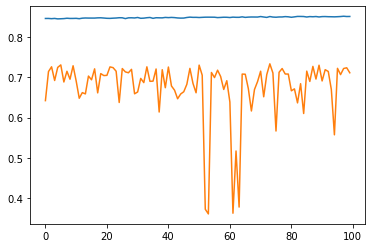

In [143]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

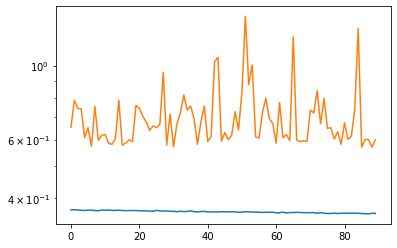

In [144]:
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.yscale('log')

In [145]:
y_pred = model.predict(X_test)

525/525 [==============================] - 2s 4ms/step


In [146]:
y_pred

array([[0.00846947, 0.5992384 , 0.39229214],
       [0.96276534, 0.03156279, 0.00567182],
       [0.9744041 , 0.02262497, 0.00297093],
       ...,
       [0.99235064, 0.00612477, 0.0015246 ],
       [0.16106243, 0.74868894, 0.09024868],
       [0.9655272 , 0.02902641, 0.00544641]], dtype=float32)

In [147]:
model.evaluate(X_test, y_test)

525/525 [==============================] - 2s 4ms/step - loss: 0.5983 - accuracy: 0.7112


[0.5983214378356934, 0.7111865878105164]

In [148]:
y_pred= np.argmax(y_pred, axis=1)

In [149]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [150]:
y_pred[0]

1

In [151]:
df = pd.DataFrame({
    'y_test': y_test.ravel().astype(int).tolist(),
    'y_pred': y_pred.ravel().astype(int).tolist(),
})

In [152]:
pd.crosstab(df['y_test'], df['y_pred'])

y_pred,0,1,2
y_test,,,
0,7016,150,27
1,459,4011,323
2,100,3787,906


In [153]:
model.save('model.h5')

In [154]:
X_train[0]

array([[ 0.001,  0.   , -0.001, -0.001,  0.   ,  0.001],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.001,  0.005,  0.003,  0.022],
       [-0.002,  0.   ,  0.   , -0.001, -0.019,  0.003],
       [ 0.   ,  0.   ,  0.001, -0.002, -0.009, -0.008]])

In [ ]:
np.argmax(model.predict(np.array([[[0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08]]])))

In [ ]:
x_new = X_test[0,:,:]

In [ ]:
argmax(model.predict(np.array([[[-0.04,  0.69,  0.72,  0.07, -0.19, -0.63, -0.71,  0.23],
       [-0.13,  0.69,  0.7 ,  0.14, -0.19, -0.64, -0.71,  0.23],
       [-0.22,  0.67,  0.67,  0.23, -0.19, -0.64, -0.71,  0.23],
       [-0.25,  0.67,  0.65,  0.25, -0.19, -0.64, -0.71,  0.23],
       [-0.31,  0.65,  0.63,  0.3 , -0.19, -0.64, -0.71,  0.23],
       [-0.35,  0.63,  0.6 ,  0.34, -0.19, -0.64, -0.71,  0.23],
       [-0.34,  0.64,  0.61,  0.33, -0.19, -0.64, -0.71,  0.23],
       [-0.34,  0.64,  0.61,  0.33, -0.19, -0.64, -0.71,  0.23],
       [-0.24,  0.67,  0.66,  0.25, -0.19, -0.64, -0.71,  0.23],
       [-0.12,  0.69,  0.7 ,  0.14, -0.19, -0.64, -0.71,  0.23]]])))

In [ ]:
x_new.shape

In [ ]:
(1,) + x_new.shape

In [ ]:
X_new = x_new.reshape((1,) + x_new.shape)
fast_or_slow = saved_model(X_new)

In [ ]:
float(fast_or_slow[0, 0])

In [ ]:
print(X_new.tolist())


In [155]:
model.save('model.h5')

In [ ]:
np.fromstring(X_new.tobytes(), dtype=float).reshape(1,10,4)

In [ ]:
comma_string = "[[[-1.402271e-03 -2.203955e-08 7.028995e-07 9.999990e-01 -2.328306e-10 -6.455648e-09 7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00]]])"

In [ ]:
spaces_string = comma_string.replace(' ', ',')
spaces_string

In [ ]:
import ast
input = np.array([[[0.08, 0.14, 0.09, 0.18],
       [0.08, 0.14, 0.09, 0.22],
       [0.08, 0.14, 0.08, 0.17],
       [0.08, 0.14, 0.08, 0.1 ],
       [0.08, 0.14, 0.07, 0.08],
       [0.08, 0.14, 0.07, 0.08],
       [0.09, 0.2 , 0.07, 0.08],
       [0.1 , 0.32, 0.07, 0.07],
       [0.1 , 0.29, 0.07, 0.07],
       [0.09, 0.24, 0.07, 0.07]]])
    
lista_string="[0.08, 0.14, 0.09, 0.18]"
lista= ast.literal_eval(lista_string)
input = np.insert(input[0], 0,lista).reshape(1,11,4)
input = input[:,:-1,:]
input

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
/content/my_model

In [ ]:
!zip -r model.zip model/ 

In [ ]:
print(json_str)

In [ ]:
input = np.array([[[ 2.66, -1.94,  0.66, -0.07],
       [ 2.66, -1.94,  0.66, -0.07],
       [ 2.65, -2.1 ,  0.66, -0.07],
       [ 2.65, -2.2 ,  0.66, -0.07],
       [ 2.65, -2.22,  0.66, -0.07],
       [ 2.65, -2.22,  0.68,  0.01],
       [ 2.64, -2.22,  0.68,  0.18],
       [ 2.64, -2.22,  0.69,  0.26],
       [ 2.64, -2.22,  0.67,  0.16],
       [ 2.64, -2.22,  0.67,  0.03]]])

In [ ]:
import ast
lista_string="[ 2.66, -1.94,  0.66, -0.07]"
lista= ast.literal_eval(lista_string)
input = np.append(input[0],[lista],axis=0).reshape(1,11,4)
input = input[:,1:,:]

In [ ]:
input

In [ ]:
X_train[0]

In [ ]:
import re

s = "[[[-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00]]]"

def add_comma(match):
    return match.group(0) + ','

s = re.sub(r'\[[0-9\.\s]+\]', add_comma, s)
s = re.sub(r'([0-9\.]+)', add_comma, s)
mylist = eval(s)

In [ ]:
mylist